In [2]:
import numpy as np
import pandas as pd

# Hyper Parameter Tuning

Hyper parameters are the parameters of the learning model that are not learned during the training process. These parameters must be finetuned separately.

In scikit-learn hyper parameters parameters are passed as arguments to the constructor of the estimator while instanciating the estimators (learners).

To know the parameters that can be passed to a constructor, we can use the signature function as shown below.

## Signature of a function

Signature of a function is named so because it idendifies the function uniquely. A function's signature includes the function's name, and the number, order and type of its arguments.

In [4]:
from inspect import signature
from sklearn.neighbors import KNeighborsClassifier
sign = signature(KNeighborsClassifier)
print(sign)

(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)


## Grid Search

Grid Search performs the search for the best values of the parameters in the specified search space and outputs the combination of parameter values that optimize the specified score function.

The `GridSearchCV` function of the `model_selection` module of Scikit-Learn performs the grid search using cross validation.

### Hyper parameter tuning for KNN Classifier

We will fine tune the hyper parameters of KNN classifier for the classification problem involving the Breast Cancer data.

Recall that hyper parameter tuning should be carried out only using the training data.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
bc = datasets.load_wine()
X = bc.data
y = 1 - bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 854987)

In [11]:
param_grid = {'n_neighbors':range(1,20)}
GS = GridSearchCV(KNeighborsClassifier(), param_grid, scoring = 'accuracy')
GS.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [12]:
GS.best_params_

{'n_neighbors': 16}

In [13]:
GS.best_score_

0.7815126050420168

In [15]:
gsResult = pd.DataFrame(GS.cv_results_)
gsResult

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.000331,0.000467,0.000667,4.717124e-04,1,{'n_neighbors': 1},0.731707,0.692308,0.717949,0.714286,0.016349,18,1.000000,1.0000,1.0000,1.000000,0.000000
1,0.000332,0.000470,0.000665,4.702468e-04,2,{'n_neighbors': 2},0.756098,0.769231,0.641026,0.722689,0.057272,15,0.910256,0.8500,0.8625,0.874252,0.025965
2,0.000000,0.000000,0.000997,1.123916e-07,3,{'n_neighbors': 3},0.707317,0.743590,0.666667,0.705882,0.031156,19,0.897436,0.8375,0.8375,0.857479,0.028254
3,0.000000,0.000000,0.000997,5.840039e-07,4,{'n_neighbors': 4},0.731707,0.769231,0.666667,0.722689,0.042030,15,0.858974,0.8250,0.8125,0.832158,0.019637
4,0.000325,0.000460,0.000666,4.707534e-04,5,{'n_neighbors': 5},0.731707,0.794872,0.666667,0.731092,0.051900,11,0.858974,0.8000,0.8375,0.832158,0.024371
5,0.000332,0.000470,0.001331,4.730005e-04,6,{'n_neighbors': 6},0.731707,0.794872,0.743590,0.756303,0.027366,4,0.846154,0.8000,0.8125,0.819551,0.019491
6,0.000000,0.000000,0.000998,2.973602e-07,7,{'n_neighbors': 7},0.682927,0.794872,0.769231,0.747899,0.048236,8,0.833333,0.7875,0.8125,0.811111,0.018737
7,0.000333,0.000470,0.000332,4.695721e-04,8,{'n_neighbors': 8},0.707317,0.794872,0.692308,0.731092,0.044954,11,0.833333,0.7875,0.8125,0.811111,0.018737
8,0.000665,0.000470,0.000333,4.713704e-04,9,{'n_neighbors': 9},0.682927,0.794872,0.692308,0.722689,0.050545,15,0.807692,0.7625,0.8125,0.794231,0.022523
9,0.000332,0.000470,0.000665,4.702465e-04,10,{'n_neighbors': 10},0.731707,0.794872,0.666667,0.731092,0.051900,11,0.794872,0.7625,0.8000,0.785791,0.016601


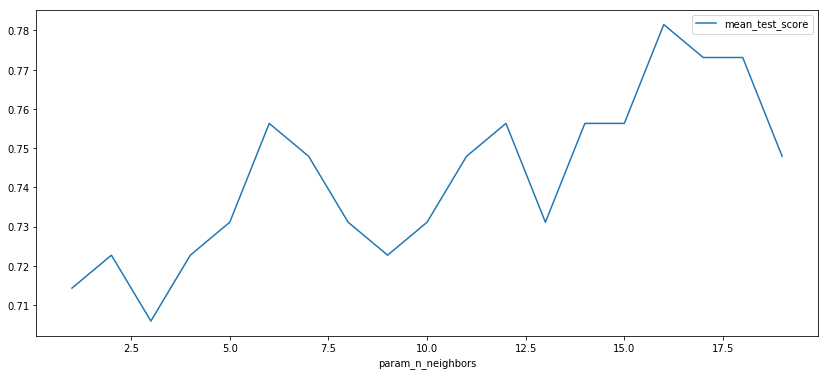

In [24]:
gsResult.plot('param_n_neighbors', 'mean_test_score',figsize=(14,6))

In [23]:
from sklearn.metrics import accuracy_score
KNNClassifier = KNeighborsClassifier(n_neighbors=2)
KNNClassifier.fit(X_train, y_train)
y_pred = KNNClassifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.6949152542372882